<a href="https://colab.research.google.com/github/TabithaWKariuki/KNN-and-Naive-Bayes-Classifiers/blob/main/K_Nearest_Neighbours_(KNN)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Perform K-nearest neighbor classification in the followind datasets [Train Dataset Source:[Link](https://archive.org/download/train5_202002/train%20%285%29.csv) , Test Dataset Source:[Link](https://archive.org/download/test1_202002/test%20%281%29.csv).

### b) Defining the Metric for Success

1. Download the two dataset.
2. Randomly partition each dataset into two parts i.e 80 - 20  sets.
3. For the datasets, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.
4. Compute the accuracy (percentage of correct classification)
5. Report the confusion matrix of each classifier.
6. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
7. Suggest and apply at least one of the optimization techniques that you learned earlier this week.
8. Provide further recommendations to improve classifier.

### c) Understanding the context 

we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

### d) Recording the Experimental Design

1. Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
6. Perform K-nearest neighbor classification.
8. Challenge your solution

### e) Data Relevance

The following datasets [Train Dataset Source:[Link](https://archive.org/download/train5_202002/train%20%285%29.csv) , Test Dataset Source:[Link](https://archive.org/download/test1_202002/test%20%281%29.csv), have appropriate columns and data to answer the questions. They are both relevant for our analysis.

## 2. Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## 3. Reading the Data

In [ ]:
# Loading the Datasets

train=pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
test=pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

## 4. Checking the Data

In [ ]:
# Determining the no. of records in our train dataset

train.shape

(891, 12)

In [ ]:
# Determining the no. of records in our test dataset

test.shape

(418, 11)

In [ ]:
# Previewing the top of our train dataset

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the top of our test dataset

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Previewing the bottom of our train dataset

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Previewing the bottom of our test dataset

test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Checking whether each column has an appropriate datatype

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking the general information of our test dataset.

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 5. External Data Source Validation

I made sure my data matches something outside of the dataset link. The measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset.

### a.Validation

## 6. Tidying the Dataset

**Checking and dealing with null values in the train dataset**

In [ ]:
# Identifying the Missing Data in out train dataset

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Replacing the null age values with mean age

mean = train['Age'].mean()

train['Age'].fillna(mean, inplace=True)


In [ ]:
# Higlighting the column of the train dataset

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Dropping unnecessary columns

train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
# Checking for null values

train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
# Filling the 2 null values with 0

train['Embarked'].fillna(0, inplace=True)

In [ ]:
# Checking for null values again

train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Checking and dealing with null values in the test dataset**

In [ ]:
# Identifying the Missing Data

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Replacing the null age values with mean age

mean = test['Age'].mean()

test['Age'].fillna(mean, inplace=True)

In [ ]:
# Dropping unnecessary columns

test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
# Filling the 1 null values with 0

test['Fare'].fillna(0, inplace=True)

In [ ]:
# Checking again for null values

test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Checking and dealing with duplicates in the train dataset**

In [ ]:
train.duplicated().sum()

111

In [ ]:
train.drop_duplicates(inplace=True)

print('New shape', train.shape)

New shape (780, 8)


**Checking and dealing with duplicated in the test dataset**

In [ ]:
test.duplicated().sum()

38

In [ ]:
test.drop_duplicates(inplace=True)

print('New shape', test.shape)

New shape (380, 7)


**Dealing with the outliers in the train dataset**

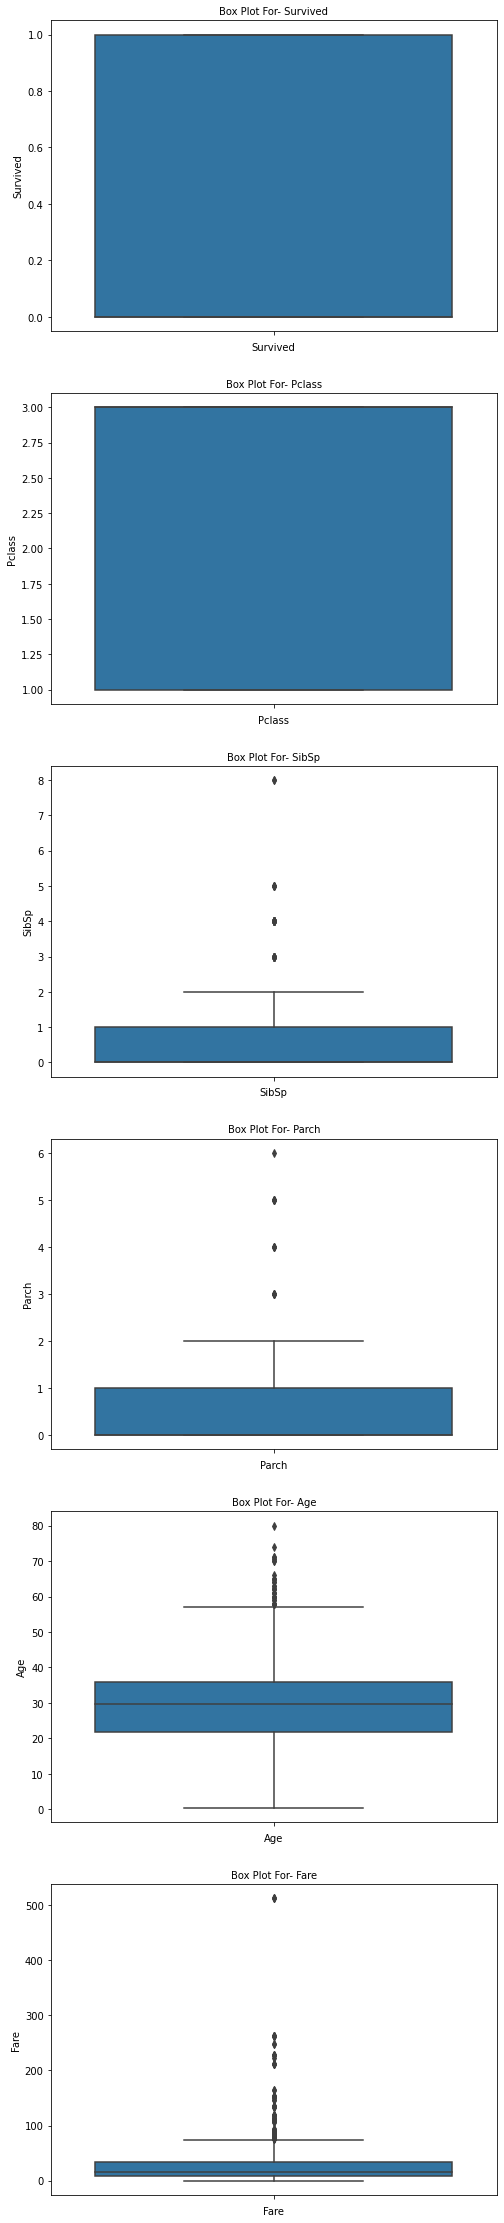

In [ ]:
# Checking for Outliers

# Checking for Outliers for the following selected factors.

col = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare']

fig,ax = plt.subplots(len(col),figsize=(8,40))
for i , col_val in enumerate(col):
  sns.boxplot(y=train[col_val],ax=ax[i])
  ax[i].set_title('Box Plot For- {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()


In [ ]:
# dealing with outliers using quantiles

Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
Newtrain = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(Newtrain.shape)

# Printing the shape of our old dataset
print(train.shape)

(609, 8)
(780, 8)


I will not be dropping the outliers since it causes a little over 20% reduction in our data.

**Checking for outliers in test dataset**

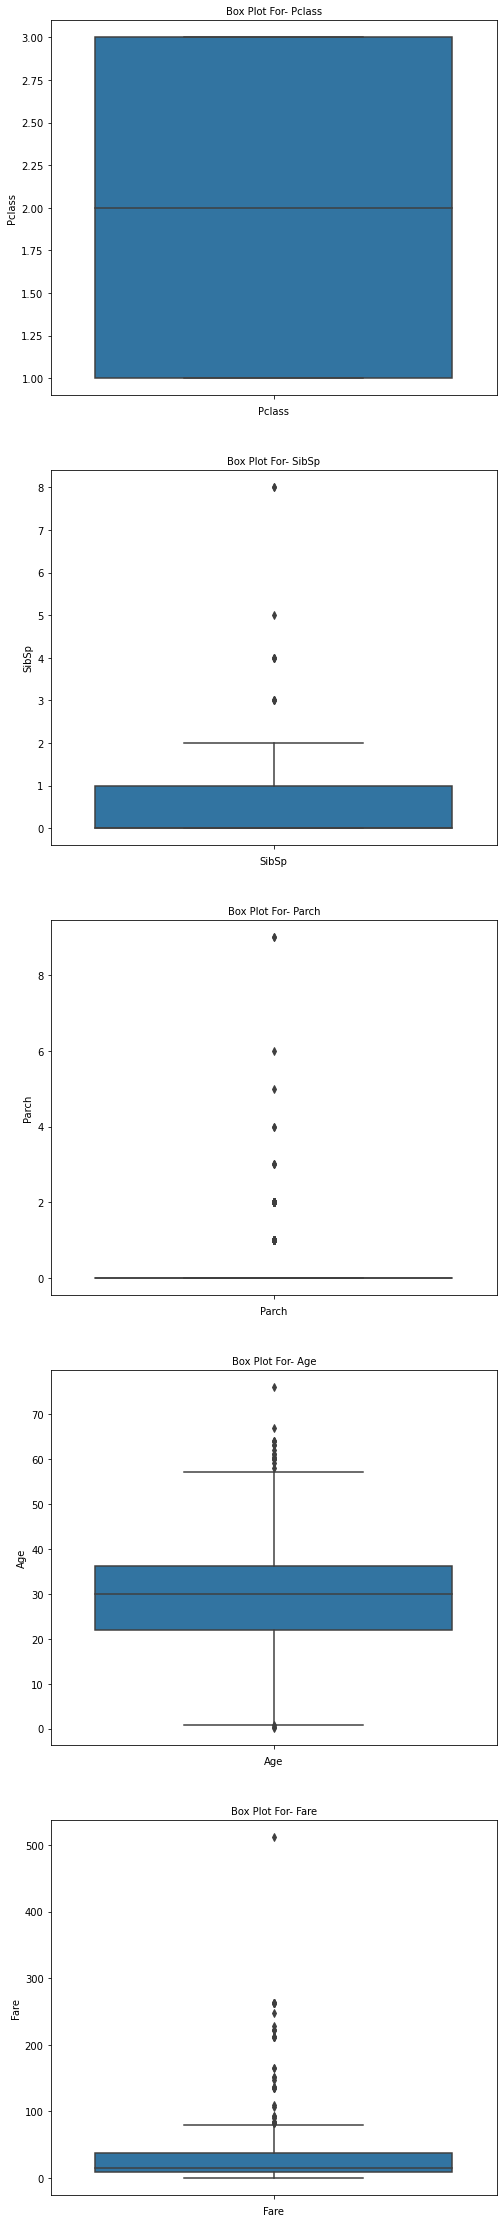

In [ ]:
# Checking for Outliers

# Checking for Outliers for the following selected factors.

col = ['Pclass', 'SibSp', 'Parch', 'Age', 'Fare']

fig,ax = plt.subplots(len(col),figsize=(8,40))
for i , col_val in enumerate(col):
  sns.boxplot(y=test[col_val],ax=ax[i])
  ax[i].set_title('Box Plot For- {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [ ]:
# dealing with outliers using quantiles

Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
Newtest = test[~((test < (Q1 - 1.5 * IQR)) | (test > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(Newtest.shape)

# Printing the shape of our old dataset
print(test.shape)

(254, 7)
(380, 7)


I will not be dropping the outliers since it causes a very high reduction in our data.

In [ ]:
# we use the to_csv function to create a csv file with the name example 
# and export it

train.to_csv('CleanTrain.csv')
test.to_csv('CleanTest.csv')

In [ ]:
# combining both train and test datasets

data = pd.concat([train, test], sort = False)
data.shape

(1160, 8)

In [ ]:
# we use the to_csv function to create a csv file with the name example 
# and export it

data.to_csv('data.csv')

In [ ]:
data['Survived'].fillna(0, inplace=True)

## 7. Exploratory Analysis

**Univaraite Analysis**

In [ ]:
# Getting summary statistics for the data

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,29.797600,0.525641,0.417949,34.829108
std,0.492657,0.854452,13.708883,0.988046,0.838536,52.263440
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.950000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Getting summary statistics for the data

test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.218421,30.316606,0.484211,0.431579,38.052544
std,0.851618,13.225585,0.925889,1.021176,57.977447
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000,7.925000
50%,2.000000,30.000000,0.000000,0.000000,15.245800
75%,3.000000,36.125000,1.000000,0.000000,36.813550
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Checking the counts for the 'sex variable'

train.Sex.value_counts()

male      488
female    292
Name: Sex, dtype: int64

Most repondents are of the male gender

In [ ]:
# Checking the counts for the 'sex variable'

test.Sex.value_counts()

male      236
female    144
Name: Sex, dtype: int64

Most respondents are of the male gender

In [ ]:
# Checking the counts for the 'embarked variable'

train.Embarked.value_counts()

S    565
C    155
Q     58
0      2
Name: Embarked, dtype: int64

In [ ]:
# Checking the counts for the 'embarked variable'

test.Embarked.value_counts()

S    250
C     97
Q     33
Name: Embarked, dtype: int64

In [ ]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
# Checking the median of our variables

train.median()

Survived     0.000000
Pclass       3.000000
Age         29.699118
SibSp        0.000000
Parch        0.000000
Fare        15.950000
dtype: float64

In [ ]:
# Checking the median of our variables

test.median()

Pclass     2.0000
Age       30.0000
SibSp      0.0000
Parch      0.0000
Fare      15.2458
dtype: float64

In [ ]:
# Checking the mode of our variables

train.mode()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,29.699118,0,0,13.0,S


In [ ]:
# Checking the mode of our variables

test.mode()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,30.27259,0,0,26.0,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5032762e10>,
      dtype=object)

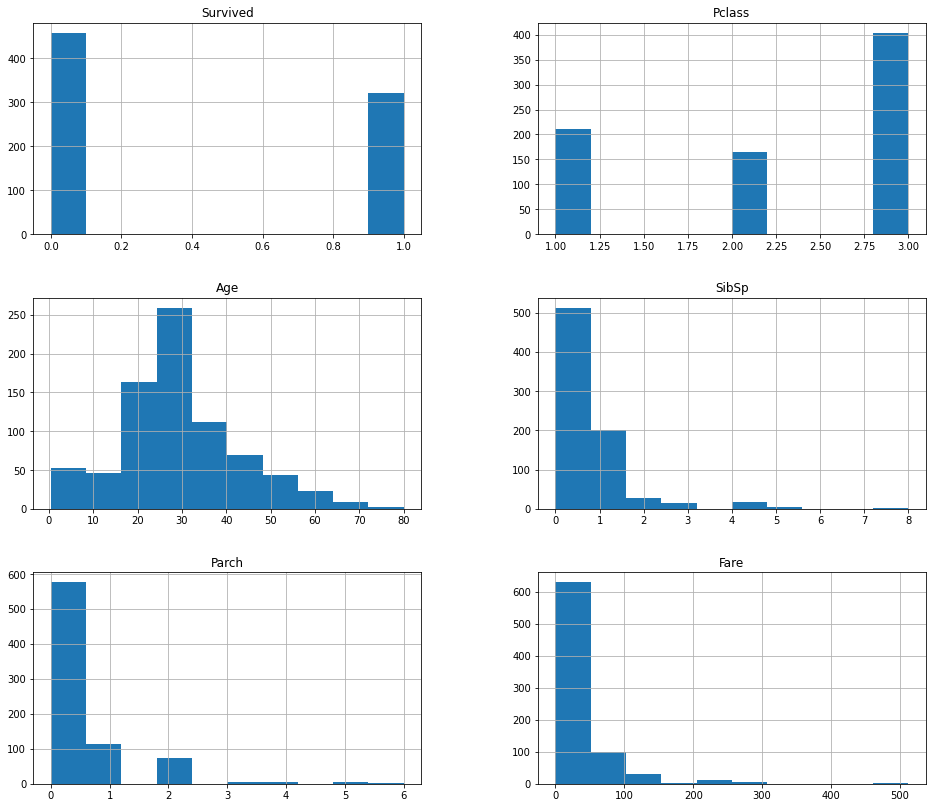

In [ ]:
# Plotting a histogram for the train dataset

train.hist(figsize = [16, 14])

The largest age group represented in our data falls between 15 and 30

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50325a6890>,
      dtype=object)

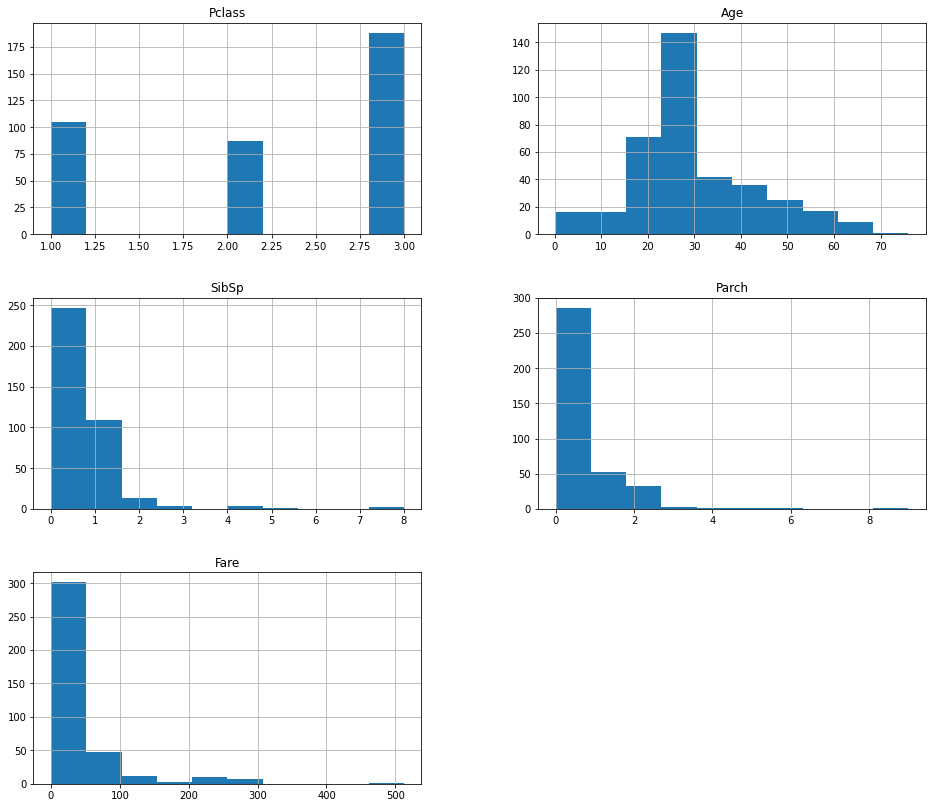

In [ ]:
# Plotting a histogram for the test dataset

test.hist(figsize = [16, 14])

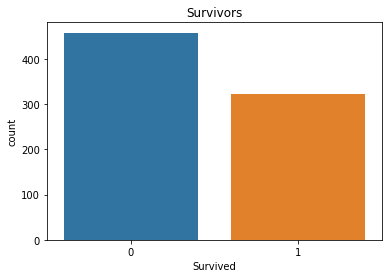

In [ ]:
# Plotting a bar chart showing "survived"

sns.countplot(x='Survived',data=train)
plt.title('Survivors')
plt.show()

Majority of the passengers did not survive. Those who survived are more than half of those who did not survived.

**Bivariate Analysis**

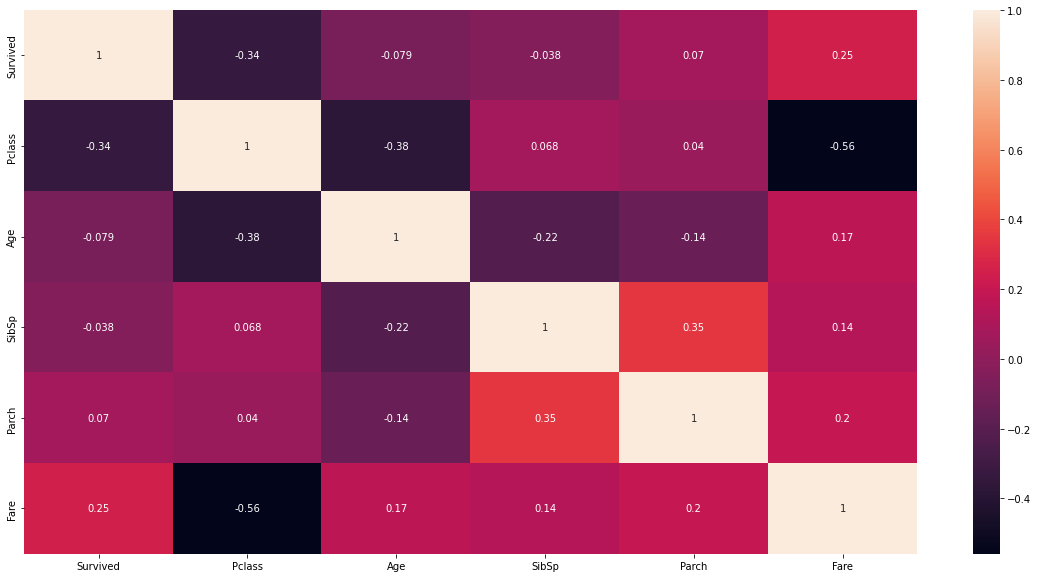

In [ ]:
# Ploting the bivariate summaries and recording our observations

corr = data.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

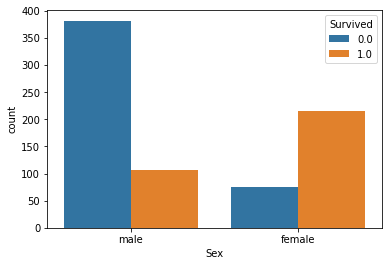

In [ ]:
# Checking sex and their survival

sns.countplot(x = 'Sex', hue = 'Survived', data = data)
plt.show()

Most male did not survived but most females survived

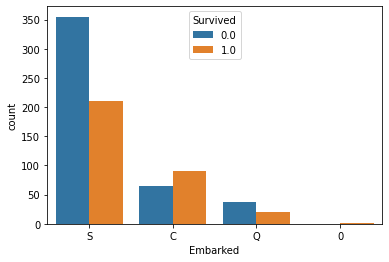

In [ ]:
# # Checking Embarked and their survival

sns.countplot(x = 'Embarked', hue = 'Survived', data = data)
plt.show()

one out of the two Individuals that embarked at point 0 did not survived

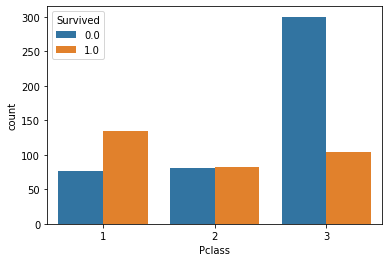

In [ ]:
# Checking Pclass and their survival

sns.countplot(x = 'Pclass', hue = 'Survived', data = data)
plt.show()

More individuals at Pclass 1 survived more than those at Pclass 3.

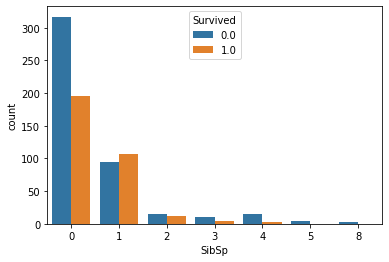

In [ ]:
# Checking SibSp and their survival

sns.countplot(x = 'SibSp', hue = 'Survived', data = data)
plt.show()

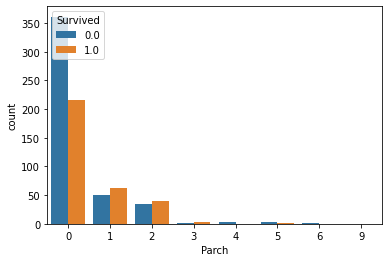

In [ ]:
# Checking fare and their survival

sns.countplot(x = 'Parch', hue = 'Survived', data = data)
plt.show()

## 8. Hyperparameter tuning

In [ ]:
# Defining the x and y variables

X=data.drop(['Survived'],axis=1).values
y=data['Survived'].values

In [ ]:
# Creating the logistic regression

from sklearn import linear_model, datasets
logistic = linear_model.LogisticRegression()

In [ ]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
# Creating grid search using 5-fold cross validation

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [ ]:
# Fitting grid search
best_model = clf.fit(X, y)

In [ ]:
# Predicting target vector
best_model.predict(X)

array([0., 1., 0., ..., 1., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy score: ", accuracy_score)

Accuracy score:  <function accuracy_score at 0x7f5035a5e560>


## 9. KNN Modeling

In [ ]:
# Label encoder

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

data['Sex']=enc.fit_transform(data['Sex'])
data['Age']=enc.fit_transform(data['Age'])
data['Fare']=enc.fit_transform(data['Fare'])

In [ ]:
data.drop(columns = ['Embarked'], axis = 1, inplace = True)

**80-20**

In [ ]:
# Defining the x and y variables

X=data.drop(['Survived'],axis=1).values
y=data['Survived'].values

In [ ]:
# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits in the 80 20 split, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[131  33]
 [ 29  39]]
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       164
         1.0       0.54      0.57      0.56        68

    accuracy                           0.73       232
   macro avg       0.68      0.69      0.68       232
weighted avg       0.74      0.73      0.73       232



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for 80 20 split is: ", accuracy_score(y_test, y_pred)*100)

Accuracy score for 80 20 split is:  73.27586206896551


**70-30**

In [ ]:
# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits in the 70 30 split, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[220  28]
 [ 49  51]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       248
         1.0       0.65      0.51      0.57       100

    accuracy                           0.78       348
   macro avg       0.73      0.70      0.71       348
weighted avg       0.77      0.78      0.77       348



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for 70 30 split is: ", accuracy_score(y_test, y_pred)*100)

Accuracy score for 70 30 split is:  77.87356321839081


**60-40**

In [ ]:
# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits in the 60 40 split, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [ ]:
# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[286  58]
 [ 58  62]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       344
         1.0       0.52      0.52      0.52       120

    accuracy                           0.75       464
   macro avg       0.67      0.67      0.67       464
weighted avg       0.75      0.75      0.75       464



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for 60 40 split is: ", accuracy_score(y_test, y_pred)*100)

Accuracy score for 60 40 split is:  75.0


The 70 30 split had the best accuracy score of 78%.

Optimization Using LDA

In [ ]:
# Perform feature scaling for Linear Discriminant Analysis
# We will use the StandardScaler for LDA 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Import the LDA class from the sklearn library

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Specify the n_components as 1 so as to check the performance of our classifier with a single linear discriminant

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Introducing KNN classifier and fit the model with the train data

from sklearn.neighbors import KNeighborsClassifier

#initializing the class with a parameter

classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Making predictions on the test data

y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the performance of the KNN classifier after performing Linear Discriminant Analysis
# Import the metrics libraries

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[287  57]
 [ 64  56]]
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       344
         1.0       0.50      0.47      0.48       120

    accuracy                           0.74       464
   macro avg       0.66      0.65      0.65       464
weighted avg       0.73      0.74      0.74       464



In [ ]:
# Evaluating the performance using an accuracy score metric

from sklearn.metrics import accuracy_score
print("LDA Accuracy is: ", accuracy_score(y_test, y_pred)*100)

LDA Accuracy is:  73.92241379310344


## 10. Conclusion

To achieve the best accuracy score;

Split the data in the ratio of 70:30 for the train and test sets

## 11. Follow up questions

### a). Did we have the right data? Yes

### b). Do we need other data to answer our question? No. Our data was sufficient for modelling.

### c). Did we have the right question? Yes